# Guided Project: Predicting Listing Gains in the Indian IPO Market Using TensorFlow

## Table of Contents 
1. [Introduction](#introduction)
2. [Loading the Data](#loading-data)
3. [Exploring the Data](#exploring-data)
5. [Data Visualization](#vis)
6. [Outlier Treatment](#outlier)
7. [Setting the Target and Predictor Variables](#set-vars)
8. [Creating the Holdout Validation Approach](#validation)
9. [Define the Deep Learning Classification Model](#define-model)
10. [Compile and Train the model](#compile-model)
11. [Model Evaluation](#eval-model)
11. [Final Conclusions](#final)

## Introduction <a name="introduction"></a>

![people-analyzing-checking-finance-graphs-office_medium.jpg](img/predictlistgains/people-analyzing-checking-finance-graphs-office_medium.jpg)

Image source: [Designed by Freepik](https://www.freepik.com/free-photo/people-analyzing-checking-finance-graphs-office_41790656.htm#fromView=search&page=1&position=25&uuid=2375a529-5c42-46ed-8c14-21d544c508f3)

This is a project I completed based on a guide called "Predicting Listing Gains in the Indian IPO Market Using TensorFlow" on the Dataquest learning platform.

In this project I have learned new skills related to Deep Learning in Python. 

The implementation is written in Python and is shown in Jupyter Notebooks.

### Goal of this project

An investment firm is interested in investing in the Initial Public Offerings (IPO) in the Indian market. The goal of this project is to build a deep learning classification model to determine if there will be listing gains for the IPO. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

## Loading the Data <a name="loading-data"></a>

This dataset comes from **moneycontrol**, and is based on past IPOs in the Indian market.

### Data dictionary
Here is the documentation of the dataset:

1. `Date`: date when the IPO was listed  
2. `IPOName`: name of the IPO  
3. `Issue_Size`: size of the IPO issue, in INR Crores  
4. `Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category  
5. `Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category  
6. `Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category  
7. `Subscription_Total`: total number of times the IPO was subscribed overall  
8. `Issue_Price`: the price in INR at which the IPO was issued  
9. `Listing_Gains_Percent`: percentage gain in the listing price over the issue price  


### Import the dependencies
First we need to import the libraries we think will at minimum be required for this project: pandas, numpy and matplotlib.pyplot.


In [133]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In addition, we install tensorflow and verify the version.

In [134]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [135]:
# test tensorflow installation
print(tf.__version__)

2.18.0


### Load and explore the data
The Indian IP Market Data observations are stored in 1 file.
1. Indian_IPO_Market_Data.csv

In [136]:
# load files into dataframes
market_df = pd.read_csv("data/predictlistgains/Indian_IPO_Market_Data.csv")

We do some initial exploring of the dataset. 

In [137]:
# explore the market data
market_df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [138]:
print(f"Number of features: {market_df.shape[1]}")
print(f"Number of observations: {market_df.shape[0]}")

Number of features: 9
Number of observations: 319


In [139]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [140]:
market_df['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [141]:
market_df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Electronics Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


#### Initial observations
1. There are 9 features (columns) and 319 observations (rows)
2. There are no missing values in the dataset
3. `Date` and `IPOName`are the only non-numerical features

We'll do some more detailed exploring in the next section.

## Exploring the Data <a name="exploring-data"></a>

We now perform an important step, namely Exploratory Data Analysis (EDA).

The target variable `Listing_Gains_Percent` is continous. Therefore, we will need to convert it into a categorical variable before we can proceed with our deep learning classification model. We assign it as 1 if its positive, else 0. 

In [142]:
# convert target variable from continuous to categorical
market_df['Listing_Gains_Percent'] = np.where(market_df['Listing_Gains_Percent'] > 0, 1, 0)
market_df['Listing_Gains_Percent'].value_counts() 

Listing_Gains_Percent
1    174
0    145
Name: count, dtype: int64

Next, we check for missing values in any of the variables of this dataset.

In [143]:
# check for empty values
market_df.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64

From the above, we see no missing values for any of the variables of this dataset.

### Observing and removing unnecessary variables
Again, show the summary statistics for the dataset.

In [144]:
# Display the descriptive statistics for the DataFrame.
market_df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Electronics Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,0.545455
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,0.498712
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,0.000000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.000000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,1.000000


What percentage of the IPOs listed at a profit?

In [145]:
market_df['Listing_Gains_Percent'].value_counts(normalize=True) * 100

Listing_Gains_Percent
1    54.545455
0    45.454545
Name: proportion, dtype: float64

54.5% of IPOs listed at a profit.

### Observations
- Each IPO has a unique name. However, for the purpose of prediction we won't need the `IPOName` variable.
- The `Date` column might reveal seasonal tendencies in the market. Let's convert that to a `Month` variable and then encode it. 
- All other variables we keep, at least until after we have made some visualisations to assist us with further refining our list of predictors. 

In [146]:
# remove the IPOName column
market_df = market_df.drop('IPOName', axis=1)
market_df.columns

Index(['Date ', 'Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price',
       'Listing_Gains_Percent'],
      dtype='object')

Note that in the list of columns above, `Date ` has a space at the end of the text. Let's clean that up.

In [147]:
market_df = market_df.rename(columns={'Date ': 'Date'})  
market_df.columns

Index(['Date', 'Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price',
       'Listing_Gains_Percent'],
      dtype='object')

Now we create a new variable `Month`, encode it and drop the `Date` variable.

In [148]:
# convert Date to Month 
market_df['Date'] = pd.to_datetime(market_df['Date'], dayfirst=True, format='%d/%m/%y')
market_df['Month'] = market_df['Date'].dt.strftime('%b')

In [149]:
# encode it
market_df = pd.get_dummies(market_df, columns=['Month'], drop_first=True, prefix='Month')

In [150]:
# drop the Date colum
market_df = market_df.drop(columns='Date', axis=1)

In [151]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Issue_Size             319 non-null    float64
 1   Subscription_QIB       319 non-null    float64
 2   Subscription_HNI       319 non-null    float64
 3   Subscription_RII       319 non-null    float64
 4   Subscription_Total     319 non-null    float64
 5   Issue_Price            319 non-null    int64  
 6   Listing_Gains_Percent  319 non-null    int64  
 7   Month_Aug              319 non-null    bool   
 8   Month_Dec              319 non-null    bool   
 9   Month_Feb              319 non-null    bool   
 10  Month_Jan              319 non-null    bool   
 11  Month_Jul              319 non-null    bool   
 12  Month_Jun              319 non-null    bool   
 13  Month_Mar              319 non-null    bool   
 14  Month_May              319 non-null    bool   
 15  Month_

Our dataset is now ready for visualisations.

## Data Visualization <a name="vis"></a>

### Data visualization of the important variables
In this section, we continue the EDA by using visualisations. We conclude the section with our findings and planned next steps.

We start with a plot for the target variable.

#### Countplot target variable

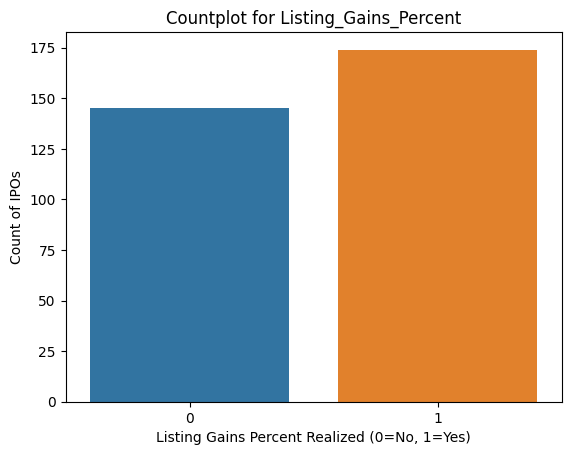

In [152]:
# countplot for the target variable
sns.countplot(x='Listing_Gains_Percent', data=market_df, hue='Listing_Gains_Percent', legend=False)
plt.title('Countplot for Listing_Gains_Percent')
plt.xlabel('Listing Gains Percent Realized (0=No, 1=Yes)')
plt.ylabel('Count of IPOs')
plt.show()

This countplot shows us similiar what we analysed before: that there is roughly a 55% vs. 45% distribution of the whether an IPO has a listing gain or not.

#### Box plot numerical variables

Next, use box plots to check for the presence of outliers in each of the numerical variables of the dataset.

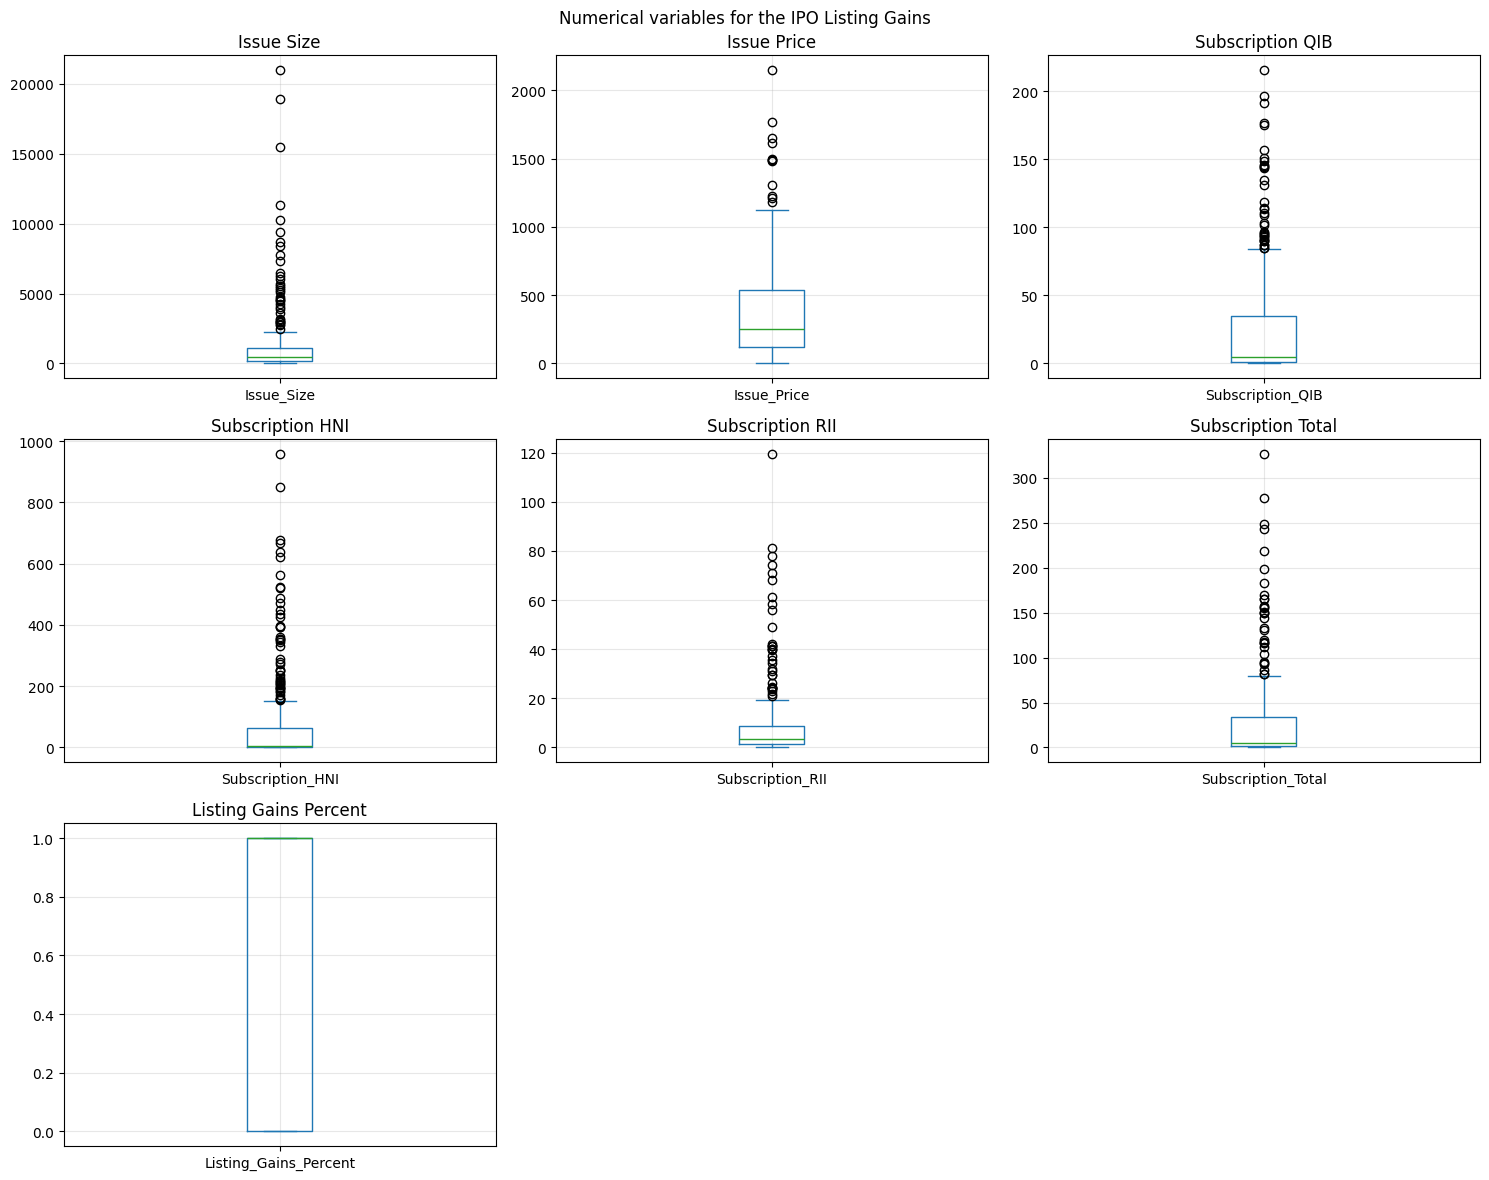

In [153]:
# list of numerical  variables
numerical_vars = ['Issue_Size', 'Issue_Price', 'Subscription_QIB', 'Subscription_HNI','Subscription_RII', 'Subscription_Total', 'Listing_Gains_Percent']

plt.figure(figsize=(15, 12))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    market_df[var].plot(kind='box')
    plt.title(var.replace('_', ' '))
    plt.grid(True, alpha=0.3)

plt.suptitle('Numerical variables for the IPO Listing Gains')
plt.tight_layout()
plt.show()

When looking at the above boxplots, depicting the distribution of the numerical variables and their outliers, there are several with outliers, starting at just below 100 for `Subscription_QIB` and `Subscription_Total`, about 20 for `Subscription_RII`, and just below 200 for `Subscription_HNI` and going upwards. 
For `Issue_Size`, there are also many outliers, whereas for `Issue_Price`, comparatively few.

We can also confirm that our target variable `Listing_Gains_Percent` has no outliers.

We may need to apply outlier treatment to our predictor variables.

#### Correlations
Let's do one more check on the correlation of the variables with the outcome. We have already provided dummy variables for the one categorical variables, `Month`. 

Then we visualize the correlations using a heatmap.

To identify which of our selected predictor variables are reasonably correlated to `Listing_Gains_Percent`, plot a Pearson's correlation heat map.

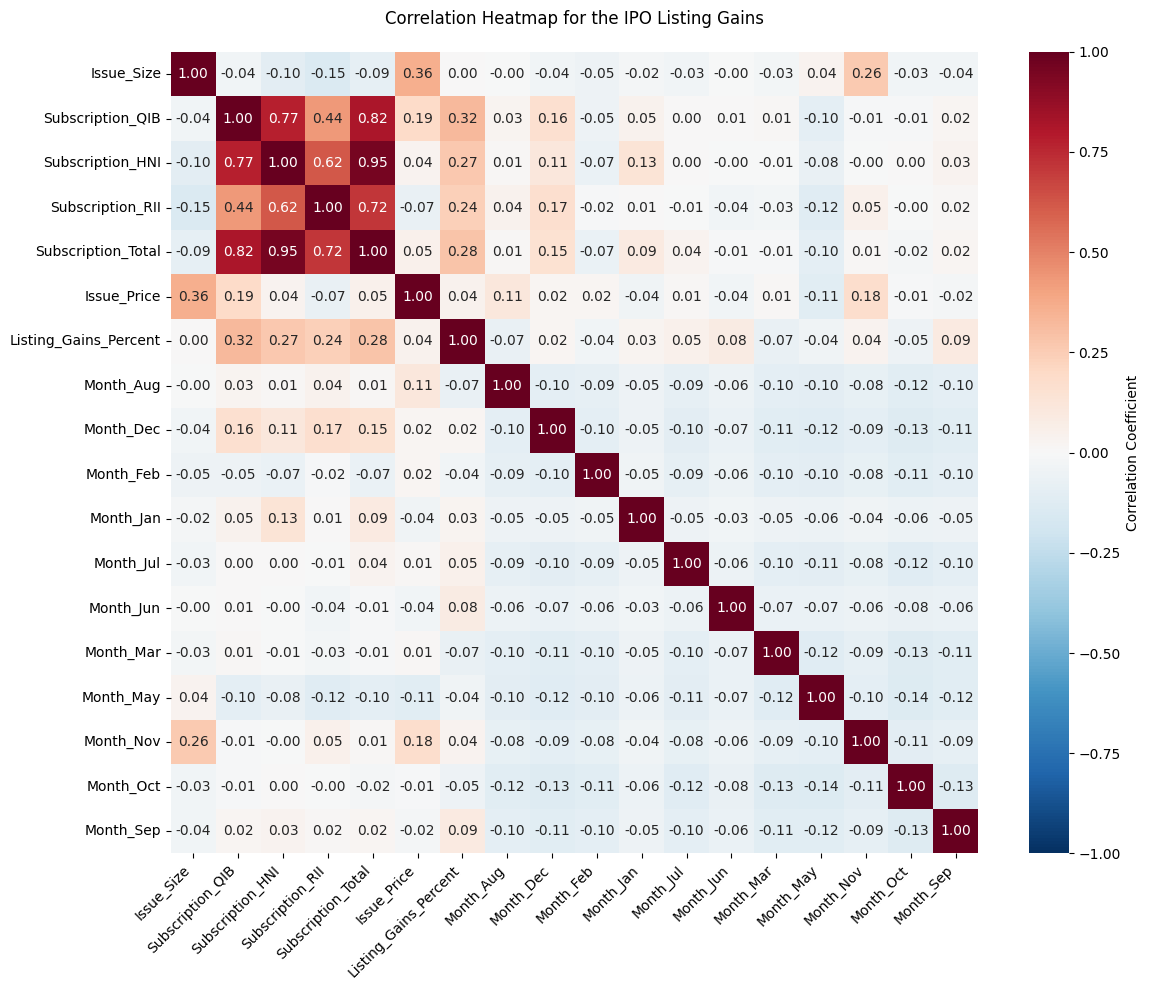

In [154]:
# calculate Pearson's correlation matrix for data
corr_matrix = market_df.corr()

plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(corr_matrix, 
                        annot=True,  # show numbers in cells
                        cmap='RdBu_r',  # red-blue diverging colormap
                        vmin=-1, vmax=1,  # Set the range of values
                        fmt='.2f',  # Format numbers to 2 decimal places
                        cbar_kws={'label': 'Correlation Coefficient'})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap for the IPO Listing Gains', pad=20)
plt.tight_layout()
plt.show()

Let's look at the above heatmap.

Observations about the correlations with the target variable `Listing_Gains_Percent`:
- The 4 `Subscription_` variables have the strongest correlations ranging from 0.28 to 0.32.
- All other variables have correlations of under 0.1. 

Of the correlations between the predictor variables, probably the one between `Issue_Price` and `Subscription_QIB` with a value of 0.19 is the most interesting.


### Conclusion
1. From the box plots, we need to apply some outlier treatment next.
2. From the correlations: we should probably only assign the 4 `Subscription_` variables and `Issue_Price` as our predictor variables.
3. Before making the final feature selection, we could present these findings so far to a specialist. For now, we go with what we found out above.

## Outlier Treatment <a name="outlier"></a>

We appy outlier treatment for finding unusual or unexpected patterns in data. We have already identified the variables that we think have the most potential to predict the target variable. 

Next we will remove the irrelevant columns. Then, we will handle the outliers from the predictor variables by applying some heuristics, namely limiting the values' lower and upper bounds. 

The variables we decided to drop are:
- `Issue_Size`
- all the `Month_` variables

In [155]:
# drop irrelevant variables
market_df = market_df.drop(['Issue_Size', 'Month_Jan', 'Month_Feb', 'Month_Mar',  'Month_May', 'Month_Jun', 
                            'Month_Jul', 'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec' ], axis=1)
market_df.columns

Index(['Subscription_QIB', 'Subscription_HNI', 'Subscription_RII',
       'Subscription_Total', 'Issue_Price', 'Listing_Gains_Percent'],
      dtype='object')

Earlier, during the EDA we found some outliers in our data by drawing box plots. We also saw all outliers are above the upper bounds. 

Let's use a quantifiable measure to confirm the presence of outliers: the skewness value. Any skewness value lower than -1 and higher than 1 indicates the presence of outliers. 

In [156]:
print(market_df['Issue_Price'].skew())
print(market_df['Subscription_QIB'].skew())
print(market_df['Subscription_HNI'].skew())
print(market_df['Subscription_RII'].skew())
print(market_df['Subscription_Total'].skew())

1.6968814842159945
2.143704625584823
3.0784448213212667
3.7082740836630137
2.9119071381074786


From out boxplots, we cannot accurately define the upper bound values for each variable. Therefore, to be more precise, we can use another method to identify and handle the outliers, namely by using the Interquartile (IQR) values. 

We'll define a function to perform this task and then execute the function on the predictor variables.


In [157]:
def handle_outliers(df, target_col=None):
    """
    Handle outliers in a DataFrame using the IQR method.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    target_col (str): Name of target variable to exclude from outlier handling
    
    Returns:
    pandas.DataFrame: DataFrame with outliers handled
    """
    
    df_clean = df.copy()
    
    # Get numerical columns excluding the target
    num_cols = df.select_dtypes(include=[np.number]).columns
    if target_col and target_col in num_cols:
        num_cols = num_cols.drop(target_col)
    
    for col in num_cols:
        # Calculate IQR statistics
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Handle outliers by capping at bounds
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_clean

In [158]:
# apply the function to the market data, excluding the target variable
market_df = handle_outliers(market_df, 'Listing_Gains_Percent')

Let's check the box plots again after removal of the outliers using the IQR method.

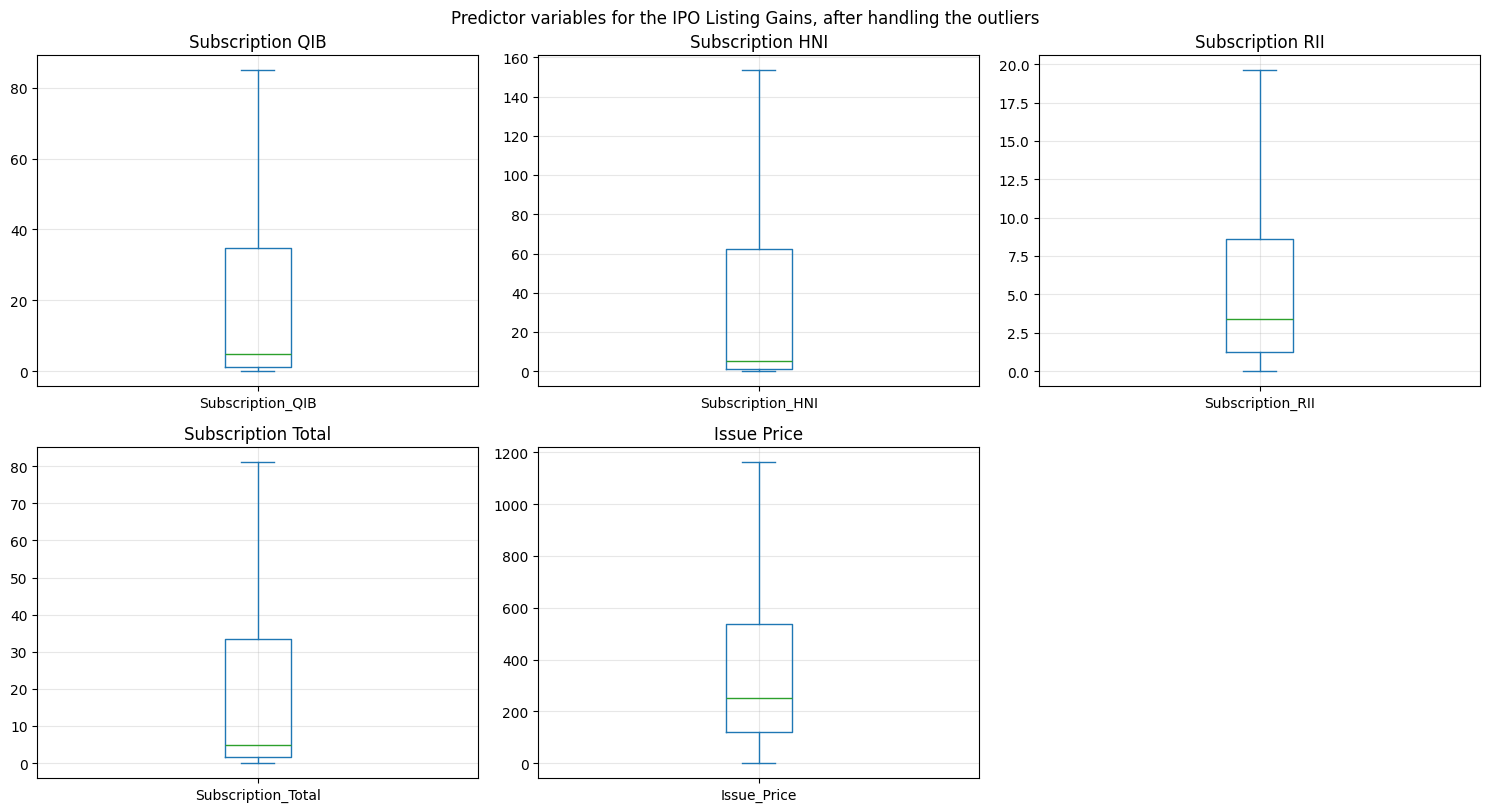

In [159]:
pred_vars = ['Subscription_QIB', 'Subscription_HNI', 'Subscription_RII',
       'Subscription_Total', 'Issue_Price']

plt.figure(figsize=(15, 12))
for i, var in enumerate(pred_vars, 1):
    plt.subplot(3, 3, i)
    market_df[var].plot(kind='box')
    plt.title(var.replace('_', ' '))
    plt.grid(True, alpha=0.3)

plt.suptitle('Predictor variables for the IPO Listing Gains, after handling the outliers')
plt.tight_layout()
plt.show()

From the above, we can see that there are no more outliers in our data. Also importantly, the upper- and lower bounds of each variables has remained the same as before.

### Conclusion
We showed 2 methods to detect outliers in our data, namely skewness and the IQR values. 

We then used the latter to handle the outliers, by finding the lower and upper bounds of these variables and replacing the values greater than the upper bound with the upper bound value. There were no outliers values less than the lower bound value, so no replacements needed to be done there.

The reason we chose the IQR values method to handle the outliers, was because we could'nt get an accurate quantifiable amount for the upper bounds of each variable just by looking at the boxplot. The skewness doesn't show the upper bound values; just wheter outliers exist or not.

## Setting the Target and Predictor Variables <a name="set-vars"></a>

After the cleaning is done, in order to achieve decent results with the predictive model, we'll need to set the target and predictor variables, as well as bring the predictor variable values to a uniform scale.

In [160]:
# set the target and predictor variables
target_variable = ['Listing_Gains_Percent']
predictors = list(set(list(market_df.columns)) - set(target_variable))

In [161]:
# normalize the predictors to normal scale
market_df[predictors] = market_df[predictors] / market_df[predictors].max()

In [162]:
market_df[predictors].describe()

,Subscription_RII,Subscription_QIB,Subscription_HNI,Issue_Price,Subscription_Total
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.309232,0.253601,0.263157,0.311793,0.252489
std,0.315147,0.342961,0.374477,0.268853,0.335939
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.065051,0.013551,0.008184,0.102454,0.020304
50%,0.174490,0.058212,0.033061,0.215239,0.060849
75%,0.439031,0.408131,0.404910,0.461472,0.412182
max,1.000000,1.000000,1.000000,1.000000,1.000000


The predictor values now all have a value between 0 and 1. Our target variable has also been separated. We now create 2 arrays before we move on to create the model.

In [163]:
X = market_df[predictors].values
y = market_df[target_variable].values

## Creating the Holdout Validation Approach <a name="validation"></a>

In order to validate the model, we split into train and test datasets. Let's use the standard 30% of the data for validation.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

Next, we explore the 4 datasets created above to see if they match our expectations.

In [165]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(223, 5)
(96, 5)
(223, 1)
(96, 1)


The dataset has been split as expected, into training and validation (test) sets, for both the predictors and the target variable. The number of observations in each dataset is as expected.

## Define, compile and evaluate the Deep Learning Classification Model <a name="define-model"></a>

We are now going to define the deep learning model, by first instatiating it, then adding the layers. 

Now, let't define now several dense (multi-layer) deep neural networks, firstly with ReLU activation function and Adam optimizer.

In [166]:
tf.random.set_seed(100)

model_relu = tf.keras.Sequential()
model_relu.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model_relu.add(tf.keras.layers.Dense(16, activation='relu'))
model_relu.add(tf.keras.layers.Dense(8, activation='relu'))
model_relu.add(tf.keras.layers.Dense(4, activation='relu'))
model_relu.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer_relu = tf.keras.optimizers.Adam(learning_rate=0.01)

/home/jean/Documents/dev/learn-data-analysis/venv-tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Alternately, we try a dense network with ReLU activation function and RMSprop optimizer.

In [167]:
model_rmsp = tf.keras.Sequential()
model_rmsp.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model_rmsp.add(tf.keras.layers.Dense(16, activation='relu'))
model_rmsp.add(tf.keras.layers.Dense(8, activation='relu'))
model_rmsp.add(tf.keras.layers.Dense(4, activation='relu'))
model_rmsp.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer_rmsp = tf.keras.optimizers.RMSprop(learning_rate=0.1, rho=0.8)

## Compile and Train the model <a name="compile-model"></a>

Once defined, our models can now be compiled and trained.

In [168]:
model_relu.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                   metrics=['accuracy'], 
                   optimizer=optimizer_relu)
model_relu.fit(X_train, y_train, epochs=250, verbose=0)

model_rmsp.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   metrics=['accuracy'],
                   optimizer=optimizer_rmsp)
model_rmsp.fit(X_train, y_train, epochs=250, verbose=0)

## Model Evaluation <a name="eval-model"></a>

Finally, we evaluate each model for its predictive ability using the accuracy metric. 

In [169]:
print("Evaluation of Model with Adam optimizer")
print("On train")
print(model_relu.evaluate(X_train, y_train))
print("On test")
print(model_relu.evaluate(X_test, y_test))
print("\n")

print("Evaluation of Model with RMSProp optimizer")
print("On train")
print(model_rmsp.evaluate(X_train, y_train))
print("On test")
print(model_rmsp.evaluate(X_test, y_test))

Evaluation of Model with Adam optimizer
On train
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8998 - loss: 0.2531
[0.2714577913284302, 0.8968609571456909]
On test
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5250 - loss: 1.7432 
[1.7264389991760254, 0.5416666865348816]


Evaluation of Model with RMSProp optimizer
On train
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6565 - loss: 0.6127  
[0.607128381729126, 0.6591928005218506]
On test
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6120 - loss: 0.6385 
[0.6367678642272949, 0.6458333134651184]


#### Observations
On evaluation of Model with Adam optimizer, we see the train accuracy of 87% is quite good, but the test accuracy is 57%, which indicates that overfitting is present.

On evaluation of Model with RMSProp optimizer, we see the train and test accuracy of 53% and 56% is quite low.

Both models therefore are not suitable for our purposes. We can try several optimizations, one of them being regularization by adding dropout layers to our first model, which specifically addresses the issue of overfitting.  

### Model optimization using regularization

As mentioned above, we now created a similar model as before, but we apply regularization use the Functional API and a neural network with dropout layers to address the issue of overfitting.

In [171]:
# model definition with dropout layers
input_layer = tf.keras.Input(shape=(X_train.shape[1],))
hidden_layer1 = tf.keras.layers.Dense(32, activation='relu')(input_layer)
drop1 = tf.keras.layers.Dropout(rate=0.40)(hidden_layer1)
hidden_layer2 = tf.keras.layers.Dense(16, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.20)(hidden_layer2)
hidden_layer3 = tf.keras.layers.Dense(8, activation='relu')(drop2)
hidden_layer4 = tf.keras.layers.Dense(4, activation='relu')(hidden_layer3)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer4)
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.BinaryCrossentropy()
metrics = ['accuracy']

# model compilation and fitting
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
model.fit(X_train, y_train, epochs=250, verbose=0)

In [172]:
# model evaluation
print("Evaluation of Model with Adam optimizer")
print("On train")
print(model.evaluate(X_train, y_train))
print("On train")
print(model.evaluate(X_test, y_test))

Evaluation of Model with Adam optimizer
On train
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7119 - loss: 0.5257
[0.5148497223854065, 0.7219731211662292]
On train
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6849 - loss: 0.6678
[0.6572349667549133, 0.6979166865348816]


Here is a summary of the evaluation of the 3 models:

| Model | Sequential, ReLu, Adam | Sequential, ReLu, RMSProp | Functional, ReLu, Adam |
|:------|:--------:|:--------:|:--------:|
| train accuracy | 87%       | 53%       | 71%       |
| test accuracy | 57%       | 57%       | 69%       |

Looking at the above, our optimization technique of swithing to a model with Functional API and dropout layers has definitely helped to solve the issue of overfitting. Even though the accuracy on the train data is now 71%, the accuracy in test data has increased to 67% which is satisfactory. 

## Final Conclusions <a name="final"></a>

Even though we succeeded in improving the model using regularization, there remains room for improvement on increasing the accuracy score. We could do any of the following:
- brush up on domain knowledge for this data, for example by reviewing the results with a domain expert. This could lead to engineering additional features which may improve the model.
- trying out different ways of tuning the hyperparameters, like number of epochs, the learning rate, etc.